In [2]:
from __future__ import division, absolute_import

import os
import sys
import random

import numpy as np

#root
absPath = '/home/angela/padding_EBI/'
sys.path.insert(0, absPath)

#from src.Target import Target

np.random.seed(8)
random.seed(8)

from src.preprocessing import *
from src.model_architecture import *
from src.training_model import *
from src.postprocessing import *
from src.comparing_results import *
#from src.callbacks import *
%matplotlib inline

In [3]:
# pre-processing

In [4]:
#folder deberia ser definida aqui arriba
folder = 'prueba/'

In [5]:
list_paddings = ['post_padding', 'pre_padding', 'mid_padding', 'stretch_padding', 'ext_padding', 'rdm_padding']

In [6]:
#loading data
file_in= "".join(['/home/angela/padding_uniprot/', 'raw_data/uniprot-reviewed_yes+AND+taxonomy_archaea-EC.tab.gz'])
df_ori = loading_data(file_in, 'EC number')

#creating dataset for the test
df = pd.DataFrame(columns=['Entry', 'Sequence', 'EC number'])
for i in ['nan', '1.', '2.', '3.', '4.', '5.', '6.', '7.']:
    df_u = df_ori[df_ori['EC number'].str.startswith(i)][:20]
    df = pd.concat([df, df_u])

In [7]:
df.sample(frac=1).reset_index().drop('index', axis=1)

,Entry,Sequence,EC number
0,Q8TPF4,MMIAGIDEAGKGPVIGPMCIGGVKIEESRAHILKVLGVADSKKLTP...,3.1.26.4
1,O50083,MNVEEMKKIAAKEALKFIEDDMVIGLGTGSTTAYFIKLLGEKLKRG...,5.3.1.6
2,Q9Y8T0,MPSPPEPPLHWRDCRLEPILGFPRPRELAKSLEVQGEEWIALLESG...,4.1.3.27
3,A3CVJ3,MGSQWTKDSVYRKAMKAGYRARAAYKLLEIQQRNGIIRPDDNVVDL...,2.1.1.166
4,Q6L1E2,MNRKDKYYIRAKRENYRSRASYKIIEINNKYNIVSRGDNVLEFGSS...,2.1.1.166
5,O05207,MSAKEKFTSLSPAEFFKRNPELAGFPNPARALYQTVRELIENSLDA...,5.6.2.3
6,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan
7,C3MYZ9,MSIDQRLQLITRNAAEIITIDELRKKLESEEKLKGYIGFEPSGLFH...,6.1.1.1
8,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan
9,Q58424,MVKILVTDPLHEDAIKILEEVGEVEVATGLTKEELLEKIKDADVLV...,1.1.1.95


(1248, 592)


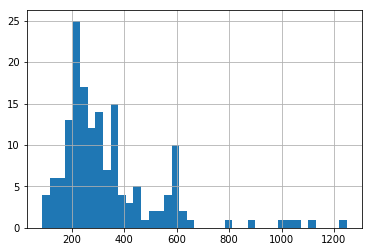

In [8]:
#max len
max_len = looking_max_len(df)
print(max_len)

In [9]:
max_lenn = max_len[1]
df_filt = filtering_over_maxlen(df, max_lenn)

In [10]:
df_filt

,Entry,Sequence,EC number
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan


In [11]:
dicti = creating_dict()

In [12]:
dicti

{'0': 0,
 'A': 1,
 'B': 2,
 'C': 3,
 'D': 4,
 'E': 5,
 'F': 6,
 'G': 7,
 'H': 8,
 'I': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [13]:
dicti_padding = {}
for i in list_paddings:
    dicti_padding[i] = processing_sequences(df_filt, i, max_lenn)

0      MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...
1      MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...
2      MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...
3      MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...
4      MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...
5      MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...
6      MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...
7      MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...
8      MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...
9      MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
10     MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
11     MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
12     MKANVYSMEGEVKEEIELPAIFNEEYRPDLIKRAVISAQTARVQPW...
13     MKVKVFNLEGEPVEEIELPKVFSTPFRPDLIRRAVIASWTHRIQPQ...
14     MYLELVKKNSVILDKDGNKVKEVELPFIFSFPVRKDIIRRVFLAEF...
15     MYLELVKKNSVILDKDGNKVKEVELPFIFSFPVRKDIIRRVFLAEF...
16     MQAVEMEKKAGNENPMREVVLDKVVINIGVGESGERHKKAYSLLEE...
17     MPAIDLSTIDLRAIKPSDLDWRKF

0      M0K00000TP00PV0LK0R0000RREGVT0000DYRK0R00000YR...
1      00M00DL0E000YQK0000KL0A0A00K0V0AGVG0LD000RV000...
2      00M0000SKLL0000T000E00SD0000S00L0KVIR0R0I0L0E0...
3      00MAFD0R0Q0K00LV00E00A00000VKE00A000K0A000R000...
4      0M00V0S0000VDQVKKAREGKKR0RFT00QT0F00E000LIFN0L...
5      MV0Q0K0P000000H00S0F000R0RK0T000RK000K00LR0K0H...
6      0MVK0R0000T0HGY0RY00KS00R000KL000L000R0KK0P0RE...
7      M000DPYKV0000I000IR0PL0V000TE000KA000V000S00L0...
8      0M0P00NPH0Y00R00ST00S00000000000Y0R0K0I00HT0K0...
9      0MNV0KV0Y0NL0000D0GSEKG0DIEL0PAVFET00EY0RP0D0L...
10     MN0V0KV0YNLDG0S00E0K00GD0IELP0A0VF0ET00EY0RPDL...
11     M0NV00KV00Y0N0L0000DG000S0000E000KG0D0I0E0L00P...
12     MK0A0N00V00YSMEG00EVK0E0EIE000LP00A000I00F0000...
13     MKVKVFNL00EG0E00PV0EEIE0L0P00K0VF0STP0FR0P0D00...
14     M0000Y0LE00LVKKN0SVILDKD0G00N0KV0K0E0VELPFI00F...
15     MY0LE00LVKK000000N0SV0I0LDK0DGNKVK0EV000ELPF00...
16     MQA0V0000EM0EKK0A00GNE0N000PM00000RE0000000V0V...
17     0M00PA00IDLS0TI00DL0R0AI

In [14]:
dicti_padding['ext_padding']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [15]:
# creating binary enzyme/no enzyme label
df_bin = binarizing_EC(df_filt)

1.0    122
0.0     20
Name: enzyme, dtype: int64


In [16]:
df_bin

,Entry,Sequence,EC number,target,enzyme
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan,<src.Target.Target object at 0x7f50aa92b240>,0.0
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan,<src.Target.Target object at 0x7f50aa92b1d0>,0.0
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan,<src.Target.Target object at 0x7f50aa92b278>,0.0
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan,<src.Target.Target object at 0x7f50aa92b2b0>,0.0
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan,<src.Target.Target object at 0x7f50aa92b2e8>,0.0
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan,<src.Target.Target object at 0x7f50aa92b320>,0.0
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan,<src.Target.Target object at 0x7f50aa92b390>,0.0
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan,<src.Target.Target object at 0x7f50aa92b9e8>,0.0
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan,<src.Target.Target object at 0x7f50aa92ba20>,0.0
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan,<src.Target.Target object at 0x7f50aa92ba58>,0.0


In [17]:
df_digit1 = first_digit_EC(df_bin)

In [18]:
df_digit1

,Entry,Sequence,EC number,target,enzyme,digit1
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan,<src.Target.Target object at 0x7f50aa92b240>,0.0,[nan]
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan,<src.Target.Target object at 0x7f50aa92b1d0>,0.0,[nan]
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan,<src.Target.Target object at 0x7f50aa92b278>,0.0,[nan]
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan,<src.Target.Target object at 0x7f50aa92b2b0>,0.0,[nan]
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan,<src.Target.Target object at 0x7f50aa92b2e8>,0.0,[nan]
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan,<src.Target.Target object at 0x7f50aa92b320>,0.0,[nan]
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan,<src.Target.Target object at 0x7f50aa92b390>,0.0,[nan]
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan,<src.Target.Target object at 0x7f50aa92b9e8>,0.0,[nan]
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan,<src.Target.Target object at 0x7f50aa92ba20>,0.0,[nan]
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan,<src.Target.Target object at 0x7f50aa92ba58>,0.0,[nan]


In [19]:
labels_task1 = bin_to_onehot(df_digit1, 2)

In [20]:
labels_task1

[array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([1., 0.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0., 1.], dtype=float32),
 array([0.

There are  0 samples with more than one label
The unique labels are  ['nan', '1', '2', '3', '4', '5', '6', '7']


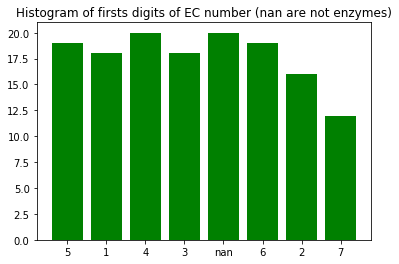

In [21]:
counting_multilabel(df_digit1)

In [22]:
ec_multilabel = encoding_as_multilabel(df_digit1, 'prueba/')

(7,)
Shape of the resulting encoding (142, 7)


In [23]:
ec_multilabel

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
 

In [24]:
data_to_hdf5('prueba/', 'data.h5', list_paddings, dicti_padding, labels_task1, ec_multilabel)

In [25]:
splitting_sets = splitting_sets(0.8, 0.5, dicti_padding['post_padding'], ec_multilabel, 'prueba/', kfold_bool=True, n_splits=3)

In [26]:
len(dicti_padding['post_padding'])

142

In [27]:
ec_multilabel.shape

(142, 7)

In [28]:
creating_augmented_data(dicti_padding, labels_task1, splitting_sets, 'prueba/', 'aug_data.h5', 
                            labels_task2 = ec_multilabel, kfold_bool = True)

In [29]:
# keeping indices total data
keeping_indices_enzymes(labels_task1, splitting_sets, 'prueba/', 'idcs_data_enz.h5', True)

In [30]:
#keeping indices aug data
file_data = os.path.join(absPath, 'data/prueba/', 'aug_data.h5')
h5f = h5py.File(file_data, 'r')
task1_aug = h5f['labels_task1'][:len(h5f['labels_task1'])]


# Loading splitting indices
file_idcs = os.path.join(absPath, 'data/prueba/', 'idcs_aug_split.pickle')

with open(file_idcs, "rb") as input_file:
    k_aug_indices = pickle.load(input_file)

keeping_indices_enzymes(labels_task1, splitting_sets, 'prueba/', 'idcs_aug_enz.h5', True)


In [31]:
# defining deep learning model
n_class = 2 #number of classes to output
drop_per = 0.2 #Input dropout 
n_neur = [314,77,8]
drop_hid = 0.5
dict_size = len(dicti)

batch_size = 6
epochss = 20

In [32]:
model = building_3dense_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 'softmax', 'prueba/')
#model = building_1convdense_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 10, 6,'softmax', 'prueba/')
#model = building_stackconv_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 10, [1,3,5,9,15], 10, 'softmax', 'prueba/')

W0711 11:27:26.542796 139986331002624 deprecation_wrapper.py:119] From /home/angela/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 11:27:26.551354 139986331002624 deprecation_wrapper.py:119] From /home/angela/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 11:27:26.552762 139986331002624 deprecation_wrapper.py:119] From /home/angela/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0711 11:27:26.557198 139986331002624 deprecation.py:506] From /home/angela/.local/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is depre

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 592, 26)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 592, 26)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15392)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 314)               4833402   
_________________________________________________________________
dropout_2 (Dropout)          (None, 314)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 77)                24255     
_________________________________________________________________
dropout_3 (Dropout)          (None, 77)                0         
__________

In [33]:
model_number_layers(model)

0 input_1
1 dropout_1
2 flatten_1
3 dense_1
4 dropout_2
5 dense_2
6 dropout_3
7 dense_3
8 dropout_4
9 dense_4


In [34]:
#saving_initial_weights(model, ['dense_1', 'dense_2', 'dense_3', 'dense_4'], [3,5,7,9], 'prueba/', 'post_padding')

In [35]:
#saving_initial_biases(model, ['dense_1', 'dense_2', 'dense_3', 'dense_4'], [3,5,7,9], 'prueba/', 'post_padding')

In [36]:
generators = trainval_generators(splitting_sets, 'post_padding', 'prueba/', batch_size, 'labels_task1', True)

In [37]:
model_type= "post_padding"

In [38]:
#adamm = Adam()
#model.compile(loss='categorical_crossentropy', optimizer = adamm, metrics=['accuracy'])

In [44]:
#Esto deberia ser una funcion "train_model" o algo asi
model_type = "post_padding"
for idx,i in enumerate(generators):
    i_train, i_val, i_test = splitting_sets[idx]
    len_train, len_val, len_test = len(i_train), len(i_val), len(i_test)
    train_generator, val_generator = i
    folder_cp = ''.join(string for string in [folder, model_type, '/', str(idx)]) 
    #print(folder_cp)
    if not os.path.exists(os.path.join(absPath, 'data/checkpoint/', folder_cp)):
        os.makedirs(''.join(string for string in [absPath, 'data/checkpoint/', folder_cp]))
    #if idx==0:
    #    callbacks_list = calling_callbacks(folder_cp, folder, 'post_padding', None, None, ['dense_1', 'dense_2', 'dense_3', 'dense_4'], 
    #                               [3,5,7,9], False, False, True, False)
    #else:
    callbacks_list = calling_callbacks(folder_cp, folder, 'post_padding', None, None, ['dense_1', 'dense_2', 'dense_3', 'dense_4'], 
                                   [3,5,7,9], False, False, False, False)
    model = building_3dense_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 'softmax', 'prueba/')
    start = time.time()
    history = model.fit_generator(generator=train_generator, 
                              validation_data=val_generator,
                             steps_per_epoch= int(len_train/batch_size),
                              validation_steps=int(len_val/batch_size),
                             epochs=epochss,
                             callbacks=callbacks_list,
                             verbose=1)
    end = time. time()
    count_time(start, end, folder, model_type)
    saving_results(history,'post_padding', folder, idx, True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 592, 26)           0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 592, 26)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 15392)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 314)               4833402   
_________________________________________________________________
dropout_18 (Dropout)         (None, 314)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 77)                24255     
_________________________________________________________________
dropout_19 (Dropout)         (None, 77)                0         
__________

18/18 [==============================] - 1s 36ms/step - loss: 0.7523 - acc: 0.7315 - val_loss: 0.8088 - val_acc: 0.0000e+00

Epoch 00005: val_acc did not improve from 0.00000
Epoch 6/20
18/18 [==============================] - 1s 36ms/step - loss: 0.8158 - acc: 0.7037 - val_loss: 0.7503 - val_acc: 0.0833

Epoch 00006: val_acc improved from 0.00000 to 0.08333, saving model to /home/angela/padding_EBI/data/checkpoint/prueba/post_padding/1/weights-improvement-006-0.0833.hdf5
Epoch 7/20
18/18 [==============================] - 1s 36ms/step - loss: 0.5237 - acc: 0.8148 - val_loss: 0.7525 - val_acc: 0.0000e+00

Epoch 00007: val_acc did not improve from 0.08333
Epoch 8/20
18/18 [==============================] - 1s 36ms/step - loss: 0.5321 - acc: 0.7870 - val_loss: 0.9126 - val_acc: 0.0000e+00

Epoch 00008: val_acc did not improve from 0.08333
Epoch 9/20
18/18 [==============================] - 1s 36ms/step - loss: 0.5193 - acc: 0.7685 - val_loss: 0.9031 - val_acc: 0.0000e+00

Epoch 00009: va

18/18 [==============================] - 1s 36ms/step - loss: 0.2411 - acc: 0.8333 - val_loss: 0.6627 - val_acc: 1.0000

Epoch 00016: val_acc improved from 0.91667 to 1.00000, saving model to /home/angela/padding_EBI/data/checkpoint/prueba/post_padding/2/weights-improvement-016-1.0000.hdf5
Epoch 17/20
18/18 [==============================] - 1s 37ms/step - loss: 0.1560 - acc: 0.9259 - val_loss: 0.5919 - val_acc: 1.0000

Epoch 00017: val_acc did not improve from 1.00000
Epoch 18/20
18/18 [==============================] - 1s 37ms/step - loss: 0.1745 - acc: 0.9074 - val_loss: 0.5095 - val_acc: 1.0000

Epoch 00018: val_acc did not improve from 1.00000
Epoch 19/20
18/18 [==============================] - 1s 37ms/step - loss: 0.1376 - acc: 0.9444 - val_loss: 0.4134 - val_acc: 1.0000

Epoch 00019: val_acc did not improve from 1.00000
Epoch 20/20
18/18 [==============================] - 1s 37ms/step - loss: 0.1274 - acc: 0.9630 - val_loss: 0.3136 - val_acc: 1.0000

Epoch 00020: val_acc did no

Fold:  0
[32, 53, 60, 94, 137, 88, 103, 119, 82, 124, 23, 50, 56, 17, 9]


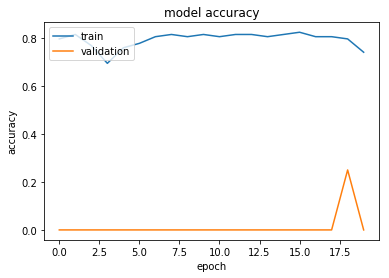

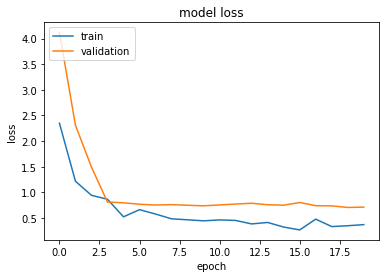

best epoch:  019
['/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/0/weights-improvement-020-0.9167.hdf5', '/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/0/weights-improvement-001-0.0000.hdf5', '/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/0/weights-improvement-019-0.2500.hdf5']
/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/0/weights-improvement-019-0.2500.hdf5
['/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/0/weights-improvement-020-0.9167.hdf5', '/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/0/weights-improvement-001-0.0000.hdf5']
Counter({1: 14, 0: 1})

Model Report
Accuracy (test set): 0.9333
Confusion matrix:
[[ 1  1]
 [ 0 13]]
Detailed classification report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.93      1.00      0.96        13

    accuracy                           0.93        15
   macro avg       0

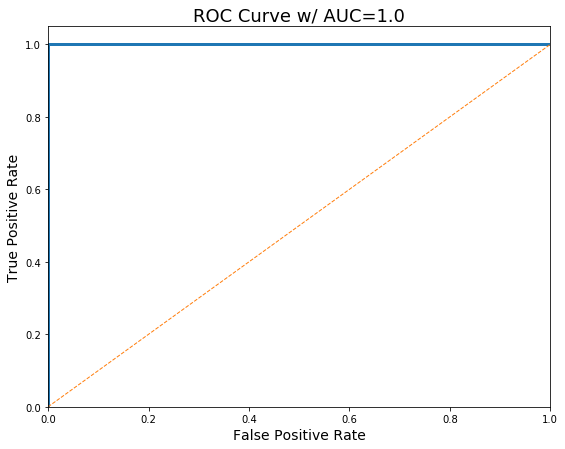

Partial AUC: 0.05 0.05
Fold:  1
[27, 40, 68, 101, 141, 79, 105, 124, 91, 120, 23, 44, 62, 0, 18]


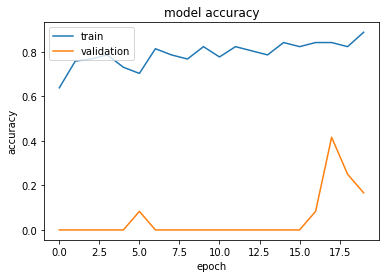

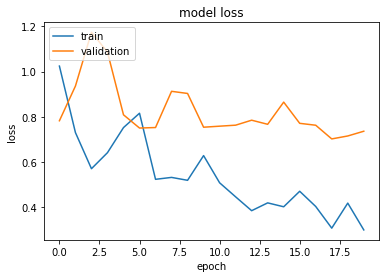

best epoch:  018
['/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/1/weights-improvement-018-0.4167.hdf5', '/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/1/weights-improvement-001-0.0000.hdf5', '/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/1/weights-improvement-006-0.0833.hdf5', '/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/1/weights-improvement-018-1.0000.hdf5']
/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/1/weights-improvement-018-0.4167.hdf5
['/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/1/weights-improvement-001-0.0000.hdf5', '/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/1/weights-improvement-006-0.0833.hdf5', '/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/1/weights-improvement-018-1.0000.hdf5']
Counter({1: 15})

Model Report
Accuracy (test set): 0.8667
Confusion matrix:
[[ 0  2]
 [ 0 13]]
Detailed classification report:
              precision    recall  f1-sc

/home/angela/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/angela/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/angela/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/angela/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

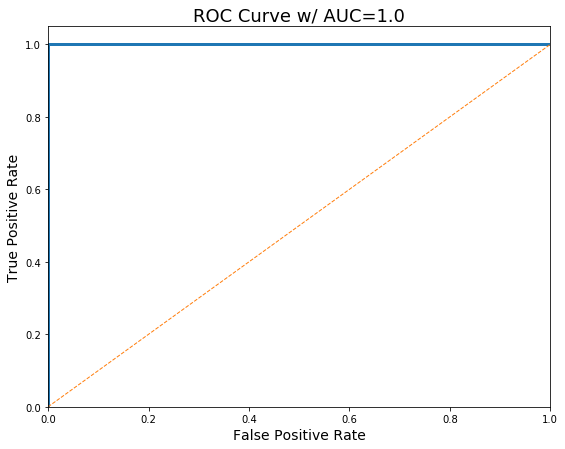

Partial AUC: 0.05 0.05
Fold:  2
[29, 47, 63, 92, 130, 72, 110, 127, 82, 115, 21, 53, 60, 3, 7]


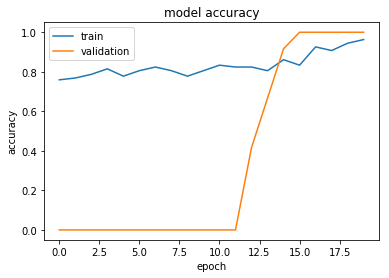

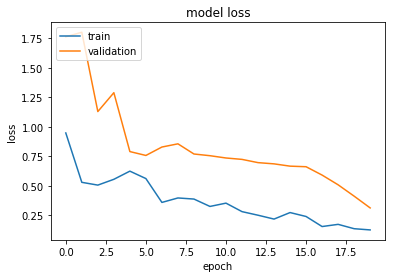

best epoch:  016
['/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/2/weights-improvement-013-0.4167.hdf5', '/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/2/weights-improvement-001-0.0000.hdf5', '/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/2/weights-improvement-019-0.6667.hdf5', '/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/2/weights-improvement-015-0.9167.hdf5', '/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/2/weights-improvement-014-0.6667.hdf5', '/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/2/weights-improvement-016-1.0000.hdf5']
/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/2/weights-improvement-016-1.0000.hdf5
['/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/2/weights-improvement-013-0.4167.hdf5', '/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/2/weights-improvement-001-0.0000.hdf5', '/home/angela/padding_EBI/data/checkpoint/prueba/post_padding/2/we

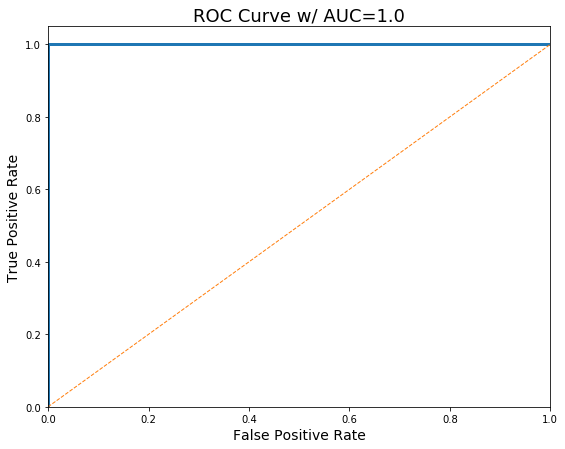

Partial AUC: 0.05 0.05


In [45]:
#post-processing

#this should be a function
for idx,i in enumerate(splitting_sets):
    print('Fold: ', idx)
    i_train, i_val, i_test = i
    print(i_test)
    #loading best model
    his_folder = ''.join(string for string in [absPath, 'data/results/', folder, model_type, '/', str(idx)])
    history = plot_history(his_folder)
    path_to_cp = ''.join(string for string in [absPath, 'data/checkpoint/', folder, model_type, 
                                            '/', str(idx)])
    model, best_path = load_best_model(history, path_to_cp)
    cps_loc = ''.join(string for string in [absPath, 'data/checkpoint/', folder, model_type, 
                                            '/', str(idx), '/*.hdf5'])
    #removing the rest of weights
    fileList = glob.glob(cps_loc, recursive=True)
    fileList.remove(best_path)
    if len(fileList) >1:
        for filePath in fileList:
            try:
                os.remove(filePath)
            except OSError:
                print("Error while deleting file")
    #loading test data    
    file_data = os.path.join(absPath, 'data/data_ec_multilabel.h5')
    
    if model_type == "aug_padding":
        file_data = os.path.join(absPath, 'data/', folder, 'aug_data.h5')
    else:
        file_data = os.path.join(absPath, 'data/', folder, 'data.h5')
    h5f = h5py.File(file_data, 'r')
    
    instarget = Target('AAAAAA')
    x_test = h5f[model_type][sorted(i_test)]
    x_test = instarget.int_to_onehot(list(x_test), len(dicti))
    y_test = h5f["labels_task1"][sorted(i_test)]
    
    #predicting 
    y_predprob = model.predict(x_test)
    y_pred = y_predprob.argmax(axis=-1)
    y_test_scalar = y_test.argmax(axis=-1)
    y_prob = y_predprob[:,1]
    
    print(Counter(y_pred))
    
    #confusion matrix
    #file_conf = ''.join(string for string in [his_folder, '/resulting_metrics.pickle'])    
    confusion_matrix(y_test_scalar, y_pred, his_folder)
    
    #AUC
    #file_auc = ''.join(string for string in [his_folder, '/AUC.pickle'])
    compute_roc(y_test_scalar, y_prob, his_folder )
    
    computing_partial_auc(y_test_scalar, y_prob, his_folder)

In [90]:
list_paddings = ["post_padding"]
df_his, k = collecting_metrics_folds("history", list_paddings, folder, 3)

In [96]:
def plotting_history(df, task, folder, k):
    """It doesn't make much sense to plot history of all the folds. We choose one and plot it"""
    history_df = df.transpose().reset_index(level=0)
    history_df.columns = ["model_type", 'acc', 'loss', 'val_acc', 'val_loss']
    
    fig = plt.figure()
    for i in history_df["model_type"]:
        plt.plot(history_df.loc[history_df.model_type==i, "acc"].values[0], label=i)
    plt.title('%s- models training accuracy (k=%i)' %(task, k))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    file_fig = ''.join(string for string in [absPath,'data/results/', folder, 'train_acc_comparison.png'])
    plt.savefig(file_fig)
    plt.show()
    
    # summarize history for val acc
    fig = plt.figure()
    for i in history_df["model_type"]:
        plt.plot(history_df.loc[history_df.model_type==i, "val_acc"].values[0], label=i)
    plt.title('%s- models validation accuracy (k=%i)' %(task, k))
    plt.ylabel('val accuracy')
    plt.xlabel('epoch')
    plt.legend()
    file_fig = ''.join(string for string in [absPath,'data/results/', folder, 'val_acc_comparison.png'])
    plt.savefig(file_fig)
    plt.show()

    # summarize history for loss
    fig = plt.figure()
    for i in history_df["model_type"]:
        plt.plot(history_df.loc[history_df.model_type==i, "loss"].values[0], label=i)
    plt.title('%s- models training loss (k=%i)' %(task, k))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    file_fig = ''.join(string for string in [absPath,'data/results/', folder, 'train_loss_comparison.png'])
    plt.savefig(file_fig)
    plt.show()

    # summarize history for validation loss
    fig = plt.figure()
    for i in history_df["model_type"]:
        plt.plot(history_df.loc[history_df.model_type==i, "val_loss"].values[0], label=i)
    plt.title('%s- models validation loss (k=%i)' %(task, k))
    plt.ylabel('val loss')
    plt.xlabel('epoch')
    plt.legend()
    file_fig = ''.join(string for string in [absPath,'data/results/', folder, 'val_loss_comparison.png'])
    plt.savefig(file_fig)
    plt.show()


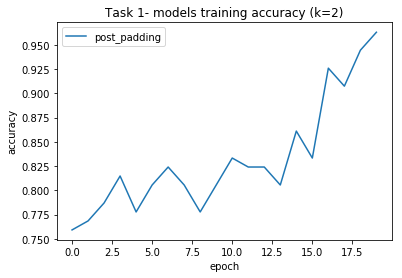

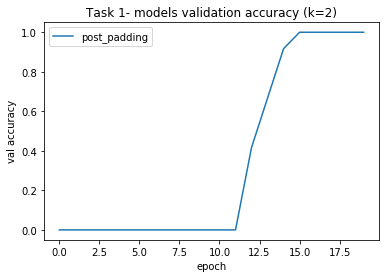

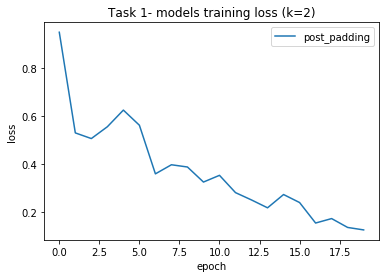

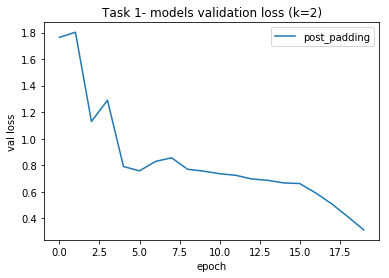

In [97]:
plotting_history(df_his, "Task 1", folder, k)

In [78]:
df_auc,k = collecting_metrics_folds("auc", list_paddings, folder, 3)
df_auc= df_auc.reset_index(0)
df_auc['pre_padding'] = df_auc['post_padding']
df_auc = df_auc.melt(id_vars='index')
df_auc

,index,variable,value
0,0,post_padding,1.0
1,1,post_padding,1.0
2,2,post_padding,1.0
3,0,pre_padding,1.0
4,1,pre_padding,1.0
5,2,pre_padding,1.0


In [87]:
def plotting_auc_boxplots(df, folder, nfolds):
    p = (ggplot(df, aes(x='variable', y="value", fill="variable"))
         +geom_boxplot()
         + scale_fill_brewer(palette="Set3", type='qual')
         +theme_bw()
         +theme(figure_size=(12,16), aspect_ratio=1, legend_title=element_blank(), axis_text_y =element_text(size=10),
                legend_text=element_text(size=10), strip_text_x = element_text(size=10))
         + ggtitle("Task 1 - AUC (%i holdouts)" %nfolds)
    )
    file_auc = ''.join(string for string in [absPath,'data/results/', folder])
    p.save(path = file_auc, format = 'pdf', dpi=300, filename="aucs_comparison.pdf")
    return

In [88]:
plotting_auc_boxplots(df_auc, folder, 3)

/home/angela/.local/lib/python3.5/site-packages/plotnine/ggplot.py:688: UserWarning: Saving 12 x 16 in image.
  from_inches(height, units), units))
/home/angela/.local/lib/python3.5/site-packages/plotnine/ggplot.py:689: UserWarning: Filename: /home/angela/padding_EBI/data/results/prueba/aucs_comparison.pdf
  warn('Filename: {}'.format(filename))


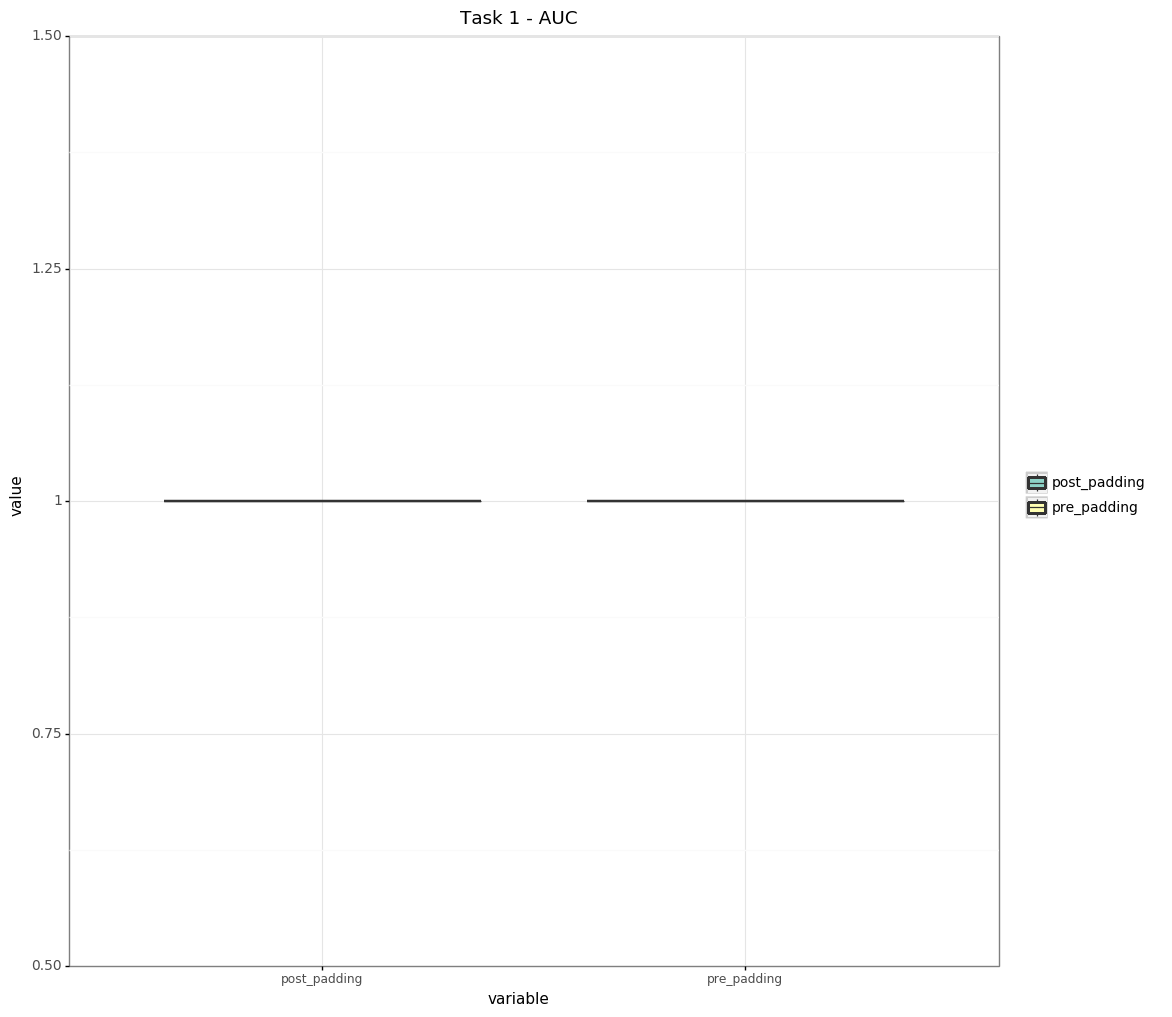

<ggplot: (8748843623635)>

In [80]:
p = (ggplot(df_auc, aes(x='variable', y="value", fill="variable"))
+geom_boxplot()
     + scale_fill_brewer(palette="Set3", type='qual')
+theme_bw()
+theme(figure_size=(12,16), aspect_ratio=1,
     #+theme(figure_size=(12, 6), 
       legend_title=element_blank(), 
       #axis_text_x =element_text(size=8, rotation=90),  
       axis_text_y =element_text(size=10),
 legend_text=element_text(size=10), strip_text_x = element_text(size=10))
     #+ facet_grid("class~variable")
     + ggtitle("Task 1 - AUC (%i holdouts)" %nfold)
    )
p

In [76]:
df_auc,k = collecting_metrics_folds("auc", list_paddings, folder, 3)
processing_roc_auc(df_auc, "auc")

,index,variable,value
0,0,post_padding,1.0
1,1,post_padding,1.0
2,2,post_padding,1.0


In [58]:
df_auc,k = collecting_metrics_folds("roc", list_paddings, folder, 3)

In [59]:
df_auc

,post_padding
0,"([0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.3846153846..."
1,"([0.0, 0.0, 0.0, 1.0], [0.0, 0.076923076923076..."
2,"([0.0, 0.0, 0.0, 1.0], [0.0, 0.076923076923076..."


In [60]:
df_auc= df_auc.reset_index(0)

In [61]:
df_auc['pre_padding'] = df_auc['post_padding']

In [62]:
df_auc = df_auc.melt(id_vars='index')
df_auc

,index,variable,value
0,0,post_padding,"([0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.3846153846..."
1,1,post_padding,"([0.0, 0.0, 0.0, 1.0], [0.0, 0.076923076923076..."
2,2,post_padding,"([0.0, 0.0, 0.0, 1.0], [0.0, 0.076923076923076..."
3,0,pre_padding,"([0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.3846153846..."
4,1,pre_padding,"([0.0, 0.0, 0.0, 1.0], [0.0, 0.076923076923076..."
5,2,pre_padding,"([0.0, 0.0, 0.0, 1.0], [0.0, 0.076923076923076..."


In [63]:
new_col_list = ['fpr','tpr','_']
for n,col in enumerate(new_col_list):
    df_auc[col] = df_auc['value'].apply(lambda value: value[n])

df_auc = df_auc.drop('value',axis=1)

In [64]:
df_auc

,index,variable,fpr,tpr,_
0,0,post_padding,"[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.38461538461538464, 0.5384615384615384,...","[2.0, 1.0, 0.9999999, 0.9952583, 0.49984732]"
1,1,post_padding,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.07692307692307693, 1.0, 1.0]","[1.999996, 0.99999595, 0.9775808, 0.52055734]"
2,2,post_padding,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.07692307692307693, 1.0, 1.0]","[1.9999995, 0.9999995, 0.93406886, 0.48460275]"
3,0,pre_padding,"[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.38461538461538464, 0.5384615384615384,...","[2.0, 1.0, 0.9999999, 0.9952583, 0.49984732]"
4,1,pre_padding,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.07692307692307693, 1.0, 1.0]","[1.999996, 0.99999595, 0.9775808, 0.52055734]"
5,2,pre_padding,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.07692307692307693, 1.0, 1.0]","[1.9999995, 0.9999995, 0.93406886, 0.48460275]"


In [66]:
df_auc2,k = collecting_metrics_folds("auc", list_paddings, folder, 3)

In [67]:
df_auc2

,post_padding
0,1.0
1,1.0
2,1.0


In [68]:
df_auc2= df_auc2.reset_index(0)

In [69]:
df_auc2 = df_auc2.melt(id_vars='index')
df_auc2

,index,variable,value
0,0,post_padding,1.0
1,1,post_padding,1.0
2,2,post_padding,1.0
